In [1]:
from sklearn.cluster import KMeans
from semi_supervised_gmm import *
from semi_supervised_clustering import *

In [2]:
x_train, y_train, x_test, y_test = mnist_data(categorical=True)
# percentages = [0.01, 0.05, 0.1, 0.2, 0.5]
labeled_data, labeled_labels, unlabeled_data, unlabeled_labels = prepare_labeled_data(x_train, y_train, percentage=0.05)
X = np.concatenate((labeled_data, unlabeled_data), axis=0)
label_assignments = list(labeled_labels) + list(unlabeled_labels)

In [3]:
print(X.shape)
print(len(labeled_data), len(labeled_labels))
print(set(labeled_labels), set(y_train))

(6000, 784)
300 300
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9} {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


# trival

In [4]:
# Create a Gaussian Mixture Model
gmm = GaussianMixture(n_components=10, random_state=0)

# Fit the model to the data
gmm.fit(X)

# Predict the cluster labels
cluster_assignments = gmm.predict(X)

centroids = gmm.means_

In [5]:
print(cluster_assignments[600:700])

[6 6 1 7 9 2 0 2 4 4 2 4 6 9 0 4 4 2 9 2 8 7 4 3 3 4 6 3 4 4 6 3 7 7 5 8 4
 4 9 3 7 7 3 6 3 7 2 1 7 4 6 0 6 2 2 2 2 5 1 5 9 4 0 3 8 5 4 0 9 3 9 7 6 5
 6 2 2 2 7 3 3 9 7 6 3 8 1 4 6 1 4 0 2 3 6 9 3 2 3 9]


/home/congyu/anaconda3/envs/congyuAI/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/congyu/anaconda3/envs/congyuAI/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


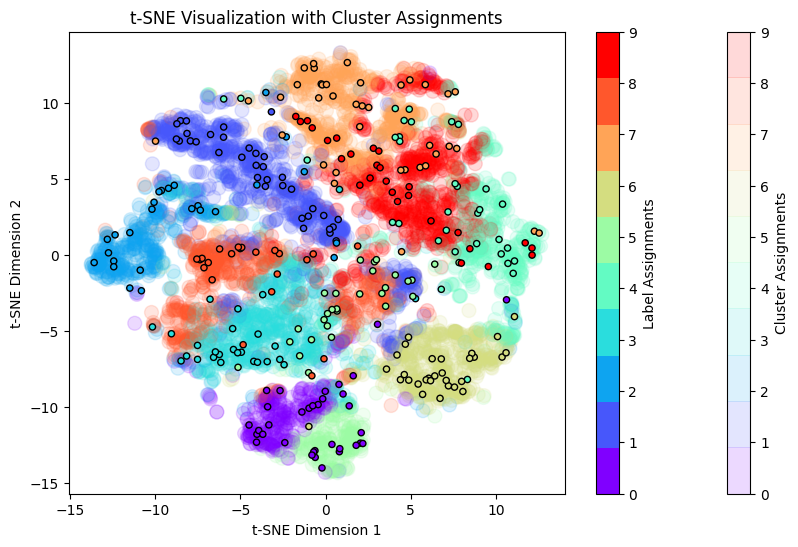

In [6]:
CopKMean.scatter_cluster_points_with_labeled(X, label_assignments, cluster_assignments, n_labeled=len(labeled_labels))

# semi-supervised

In [4]:
print(labeled_data.shape)

(300, 784)


In [14]:
# Create and fit the semi-supervised GMM
ssgmm = SemiSupervisedGMM(n_components=10)
ssgmm.fit(X, labeled_data, labeled_labels)
cluster_assignments = ssgmm.predict(X)
centroids = ssgmm.centroids

In [15]:
print(cluster_assignments[600:700])

[5 0 5 5 7 8 9 5 5 0 6 7 6 6 0 8 0 5 8 2 0 7 6 5 5 5 6 7 0 8 0 1 8 8 9 5 8
 4 1 9 7 9 6 1 8 5 8 8 3 7 9 4 1 5 9 0 6 5 8 7 5 1 6 4 0 1 9 5 6 0 7 2 7 1
 8 5 7 6 5 1 0 0 7 6 7 6 8 7 5 6 4 9 6 6 8 5 7 6 5 9]


In [16]:
# label_assignments = list(labeled_labels) + list(unlabeled_labels)
# Method.scatter_cluster_points_with_labeled(X, label_assignments, labeled_labels)

/home/congyu/anaconda3/envs/congyuAI/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/congyu/anaconda3/envs/congyuAI/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


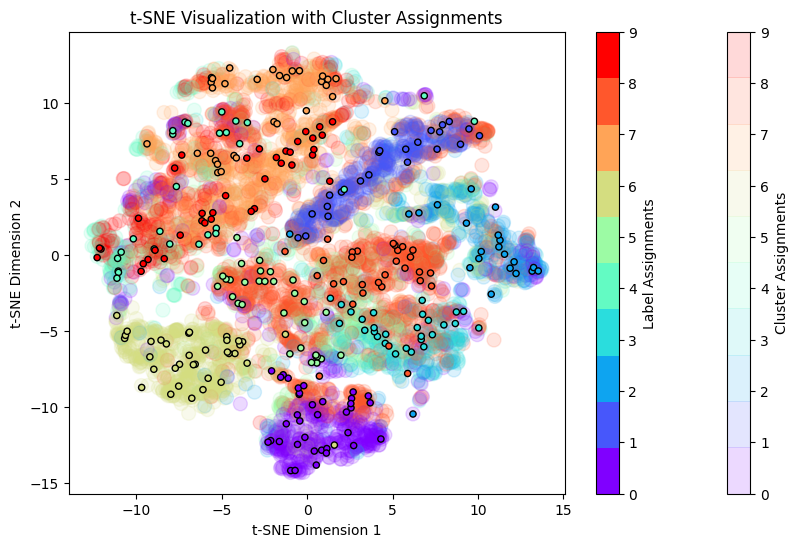

In [19]:
CopKMean.scatter_cluster_points_with_labeled(X, label_assignments, cluster_assignments, n_labeled=len(labeled_labels))